# Binary Class Classification
This Jupyter Notebook takes binary text data and classifies them.

Following models are used to classify, and the performance metrics are used to visualize each model's performance:
- `scikit-learn` Models:
    - Logistic Regression
    - Naive Bayes
    - SVM (Support Vector Machine)
    - Gradient Boosting
- CNN (Convolutional Neural Network) Model
- BERT Transformer Pre-Trained Model

## 0. Import Libraries

In [1]:
import pandas as pd
from utils import *
from model_sklearn import *
from model_cnn import *
from model_bert import *
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
import warnings
warnings.filterwarnings("ignore")

[nltk_data] Downloading package stopwords to /home/jiwon/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /home/jiwon/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package punkt to /home/jiwon/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/jiwon/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /home/jiwon/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


## 1. Data Preprocessing
Note that the [Disaster Tweets](https://www.kaggle.com/datasets/vstepanenko/disaster-tweets) dataset from [Kaggle](https://www.kaggle.com) is used for this demo.

If there is an encoding issue with your BYOD, refer to the following encoding options: https://stackoverflow.com/a/45530363

In [2]:
df = pd.read_csv('data/tweets.csv', encoding='utf-8') # read *.csv dataset into pandas dataframe

df, le_name_mapping = encode_label(df) # encode text labeled category
print(le_name_mapping) # print out the mapping status (i.e. "Spam" falls under '0')

df['clean_text'] = df['text'].apply(lambda x: text_preprocess(x)) # preprocess text data
X_train, X_test, y_train, y_test = train_test_split(df["clean_text"], df["target"], test_size=0.2, shuffle=True) # 8:2 = train:test set split = d

{0: 0, 1: 1}


## 2. EDA (Exploratory Data Analysis)
In this step, the input text data is getting analyzed.

Following information will be displayed:
- Data distribution per label
- Word count for each label
- Character count for each label
- Unique word count for each label

Data Distribution Per Label
0    9256
1    2114
Name: target, dtype: int64


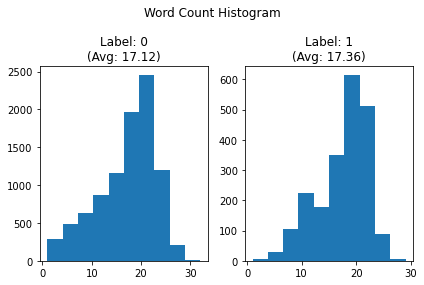

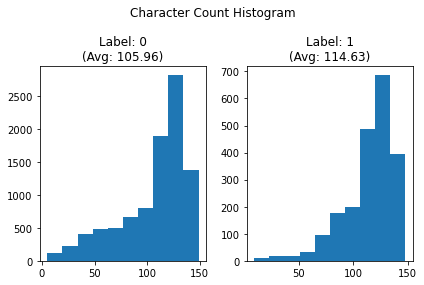

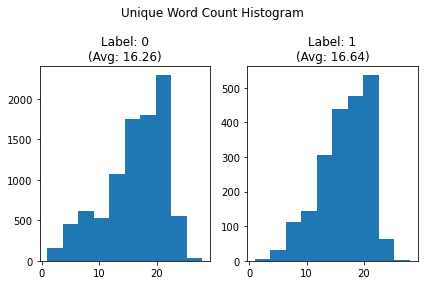

In [3]:
print("Data Distribution Per Label")
print(df['target'].value_counts())
word_count(df).show()
char_count(df).show()
unique_word_count(df).show()

## 3. TF-IDF
TF-IDF vectorize is required for scikit-learn models are required.

In [4]:
tfidf_vectorizer = TfidfVectorizer(use_idf=True, lowercase=False, stop_words='english')
X_train_vectors_tfidf = tfidf_vectorizer.fit_transform(X_train) # tfidf runs on non-tokenized sentences
X_val_vectors_tfidf = tfidf_vectorizer.transform(X_test) # no fit/train for test data, only transform

## 4. Scikit-Learn Model
Following models are getting trained and make predictions:
- Logistic Regression
- Naive Bayes
- SVM (Support Vector Machine)
- Gradient Boosting

ROC Curve is additionally plotted for the performance measurement purposes.

Model:	 Logistic Regression
Train:	 0.0338 seconds
Predict: 0.0002 seconds
VRAM:	 Sklearn models do not utlize any GPUs
              precision    recall  f1-score   support

           0       0.87      0.99      0.92      1855
           1       0.86      0.35      0.49       419

    accuracy                           0.87      2274
   macro avg       0.86      0.67      0.71      2274
weighted avg       0.87      0.87      0.85      2274



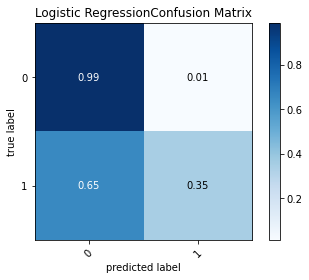

Model:	 Naive Bayes
Train:	 0.0026 seconds
Predict: 0.0004 seconds
VRAM:	 Sklearn models do not utlize any GPUs
              precision    recall  f1-score   support

           0       0.84      1.00      0.91      1855
           1       0.98      0.15      0.26       419

    accuracy                           0.84      2274
   macro avg       0.91      0.58      0.59      2274
weighted avg       0.87      0.84      0.79      2274



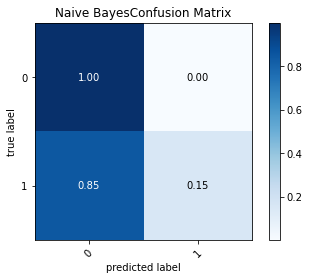

Model:	 SVM
Train:	 24.4293 seconds
Predict: 0.8009 seconds
VRAM:	 Sklearn models do not utlize any GPUs
              precision    recall  f1-score   support

           0       0.89      0.99      0.94      1855
           1       0.91      0.47      0.62       419

    accuracy                           0.89      2274
   macro avg       0.90      0.73      0.78      2274
weighted avg       0.89      0.89      0.88      2274



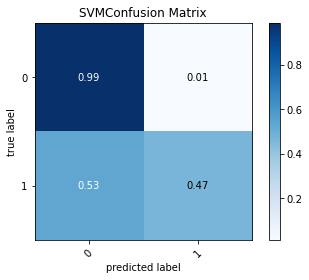

Model:	 Gradient Boosting
Train:	 1.5072 seconds
Predict: 0.0016 seconds
VRAM:	 Sklearn models do not utlize any GPUs
              precision    recall  f1-score   support

           0       0.84      1.00      0.91      1855
           1       0.91      0.19      0.31       419

    accuracy                           0.85      2274
   macro avg       0.88      0.59      0.61      2274
weighted avg       0.86      0.85      0.80      2274



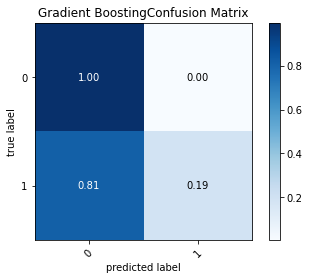

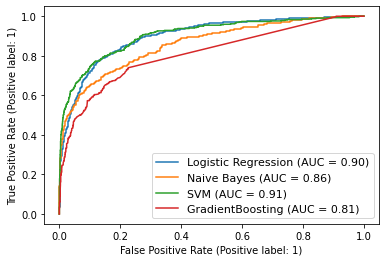

In [5]:
lg_model = Logistic(X_train_vectors_tfidf, y_train, X_val_vectors_tfidf, y_test)
lg_model.runner()

nb_model = NaiveBayes(X_train_vectors_tfidf, y_train, X_val_vectors_tfidf, y_test)
nb_model.runner()

svm_model = SVM(X_train_vectors_tfidf, y_train, X_val_vectors_tfidf, y_test)
svm_model.runner()

gb_model = GradientBoosting(X_train_vectors_tfidf, y_train, X_val_vectors_tfidf, y_test)
gb_model.runner()

sklearn_roc_curve(y_test, [lg_model.y_prob, nb_model.y_prob, svm_model.y_prob, gb_model.y_prob], 
                ['Logistic Regression', 'Naive Bayes', 'SVM', 'GradientBoosting']).show()

## 5. CNN (Convolutional Neural Network) Model

1 Physical GPUs, 1 Logical GPUs
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 32, 32)            160000    
                                                                 
 conv1d (Conv1D)             (None, 32, 32)            3104      
                                                                 
 max_pooling1d (MaxPooling1D  (None, 16, 32)           0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 512)               0         
                                                                 
 dense (Dense)               (None, 250)               128250    
                                                                 
 dropout (Dropout)           (None, 250)               0         
                        

2022-05-08 18:56:28.280608: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-05-08 18:56:28.286528: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-05-08 18:56:28.286763: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-05-08 18:56:28.287357: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags

0epoch [00:00, ?epoch/s]

0batch [00:00, ?batch/s]

2022-05-08 18:56:29.450618: I tensorflow/stream_executor/cuda/cuda_dnn.cc:368] Loaded cuDNN version 8100
2022-05-08 18:56:30.114074: I tensorflow/stream_executor/cuda/cuda_blas.cc:1786] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.


Train:	 36.9661 seconds
Predict: 0.1088 seconds
Accuracy: 86.94%
              precision    recall  f1-score   support

           0       0.92      0.92      0.92      1855
           1       0.65      0.64      0.65       419

    accuracy                           0.87      2274
   macro avg       0.78      0.78      0.78      2274
weighted avg       0.87      0.87      0.87      2274



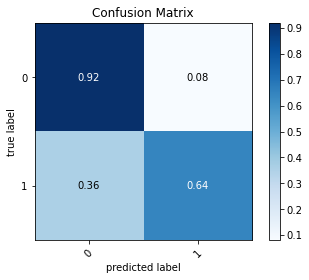

In [6]:
max_words = get_max_words(df)
num_class = len(le_name_mapping)
cnn_model = CNNBinary(X_train, y_train, X_test, y_test, max_words, num_class)
cnn_model.runner()

## 6. BERT Transformer Pre-Trained Model

1 Physical GPUs, 1 Logical GPUs
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 text (InputLayer)              [(None,)]            0           []                               
                                                                                                  
 keras_layer (KerasLayer)       {'input_mask': (Non  0           ['text[0][0]']                   
                                e, 128),                                                          
                                 'input_word_ids':                                                
                                (None, 128),                                                      
                                 'input_type_ids':                                                
                                (None, 128)}                  

0epoch [00:00, ?epoch/s]

0batch [00:00, ?batch/s]

Train:	 2048.73 seconds
Predict: 6.3829 seconds
Accuracy: 89.71%
              precision    recall  f1-score   support

           0       0.93      0.95      0.94      1855
           1       0.74      0.68      0.71       419

    accuracy                           0.90      2274
   macro avg       0.84      0.81      0.82      2274
weighted avg       0.89      0.90      0.90      2274



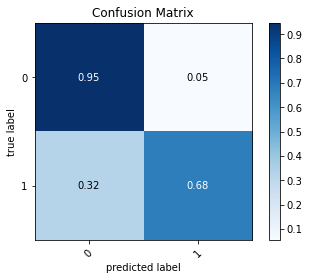

In [7]:
num_class = len(le_name_mapping)
bert_model = BERTBinary(X_train, y_train, X_test, y_test, num_class)
bert_model.runner()